# NBA Salary Exploratory Analysis

Team and player salaries are crucial to the game of basketball. Due to the soft salary cap, the degree to which a team can spend money and remain flexible dictates roster construction and management.

The following explores the `TeamSalaries` and `HistoricalSalaries` classes of the [py_ball](https://github.com/basketballrelativity/py_ball) package by exploring the `salaries` endpoint of the [Hoopshype.com](https://hoopshype.com). The goal of this analysis is to explore the salary data available.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from py_ball import salaries

ID_TO_TEAM_NBA = {'1610612761': 'TOR', '1610612743': 'DEN',
                  '1610612765': 'DET', '1610612740': 'NOP',
                  '1610612749': 'MIL', '1610612744': 'GSW',
                  '1610612759': 'SAS', '1610612757': 'POR',
                  '1610612746': 'LAC', '1610612742': 'DAL',
                  '1610612763': 'MEM', '1610612755': 'PHI',
                  '1610612738': 'BOS', '1610612750': 'MIN',
                  '1610612766': 'CHA', '1610612754': 'IND',
                  '1610612753': 'ORL', '1610612748': 'MIA',
                  '1610612745': 'HOU', '1610612758': 'SAC',
                  '1610612762': 'UTA', '1610612751': 'BKN',
                  '1610612737': 'ATL', '1610612756': 'PHX',
                  '1610612764': 'WAS', '1610612752': 'NYK',
                  '1610612760': 'OKC', '1610612747': 'LAL',
                  '1610612739': 'CLE', '1610612741': 'CHI'}

First, let's checkout the `TeamSalaries` class. Because this pulls current and future salary information for each player and team, initializing the class takes a little time.

## Team Salaries (Current and Future)

In [2]:
team_salaries = salaries.TeamSalaries()

In [3]:
team_df = pd.DataFrame(team_salaries.totals).T
team_df.columns = team_salaries.totals_columns

In [4]:
team_df['team'] = [ID_TO_TEAM_NBA[x] for x in team_df.index.values]

In [5]:
team_df.head()

,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,url,team
1610612737,104910886,57008180,0,0,0,0,https://hoopshype.com/salaries/atlanta_hawks/,ATL
1610612738,125334993,121175394,47226370,13932142,92857,0,https://hoopshype.com/salaries/boston_celtics/,BOS
1610612739,123255073,134270402,42967347,41949165,28942830,0,https://hoopshype.com/salaries/cleveland_caval...,CLE
1610612740,116052756,88788693,54882886,27020000,0,0,https://hoopshype.com/salaries/new_orleans_pel...,NOP
1610612741,112598201,82649833,55518259,19500000,0,0,https://hoopshype.com/salaries/chicago_bulls/,CHI


The table above shows yearly salary breakdowns through the 2023-24 NBA season by team, along with the data source URL. Going into the offseason, financial flexibility allows for the pursuit of free agents. To visualize this, let's compare the team salary from the 2018-19 season to the salary on the books already for the 2019-20 season.

In [6]:
def compare_seasons(team_df, season_1, season_2):
    """ compare_seasons plots a paired barchart comparing
    the team salaries from two consecutive seasons
    """

    team_df = team_df.sort_values(season_1, ascending=False)
    season_1_vals = [x/1000000.0 for x in team_df[season_1]]
    season_2_vals = [x/1000000.0 for x in team_df[season_2]]

    ind = np.arange(30)  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 9))
    rects1 = ax.bar(ind - width/2, season_1_vals, width,
                    color='gray', label=season_1)
    rects2 = ax.bar(ind + width/2, season_2_vals, width,
                    color='lightgray', label=season_2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Salary ($MM)', fontsize=16)
    ax.set_title('Team Salary by Season', fontsize=16)
    ax.set_xticks(ind)
    ax.set_xticklabels(list(team_df['team']), rotation=45, fontsize=14)
    ax.legend(fontsize=14)
    
    plt.close()
    return fig

In [7]:
team_viz = compare_seasons(team_df, '2018/19', '2019/20')

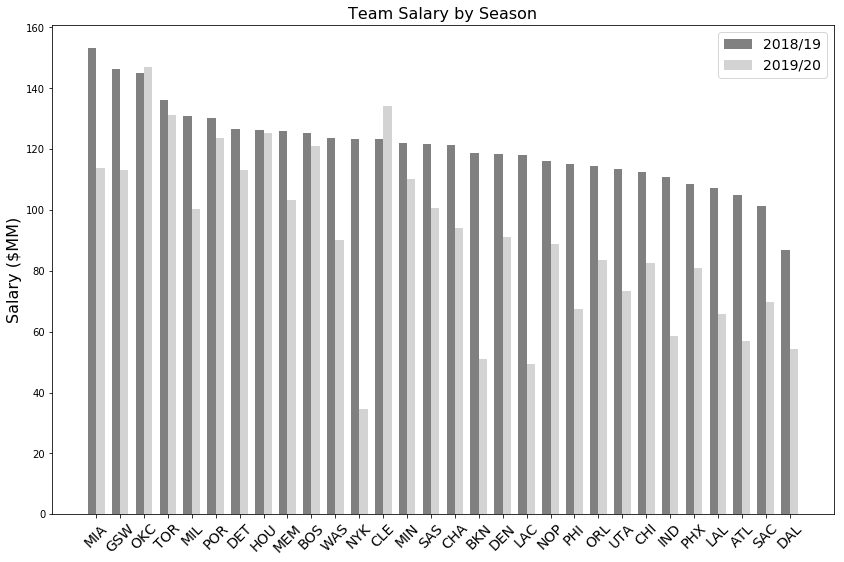

In [8]:
team_viz

Some interesting takeaways from the above figure:
- Oklahoma City and Miami already have a higher salary for the 2019/20 season
- The Knicks, Nets, and Clippers appear to have the most flexibility leading into the offseason

## Player Salaries (Current and Future)

In [9]:
team_id = '1610612755'  # Philadelphia
team_player = team_salaries.team_player_salaries[team_id]

In [10]:
team_player_salary = [team_player[x]['salary'] for x in team_player]
team_player_options = [team_player[x]['options'] for x in team_player]

salary_df = pd.DataFrame(team_player_salary)
option_df = pd.DataFrame(team_player_options)

In [11]:
salary_df.columns = team_salaries.team_player_columns
option_df.columns = team_salaries.team_player_columns[:-1]

salary_df['name'] = [x for x in team_player]
option_df['name'] = [x for x in team_player]

In [12]:
salary_df.head()

,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,url,name
0,25467250,27250000,29000000,0,0,0,https://hoopshype.com/player/joel-embiid/salary/,joel-embiid
1,19841627,19841627,0,0,0,0,https://hoopshype.com/player/jimmy-butler/salary/,jimmy-butler
2,14800000,0,0,0,0,0,https://hoopshype.com/player/tobias-harris/sal...,tobias-harris
3,12250000,0,0,0,0,0,https://hoopshype.com/player/jj-redick/salary/,jj-redick
4,9490740,0,0,0,0,0,https://hoopshype.com/player/boban-marjanovic/...,boban-marjanovic


In [13]:
option_df.head()

,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,name
0,,,,,,,joel-embiid
1,,Player,,,,,jimmy-butler
2,,,,,,,tobias-harris
3,,,,,,,jj-redick
4,,,,,,,boban-marjanovic


With this information, let's create an analogous figure for player salaries.

In [14]:
def compare_player_seasons(player_df, option_df, season_1, season_2, team_id):
    """ compare_player_seasons plots a paired barchart comparing
    the player salaries from two consecutive seasons
    """

    player_df['options'] = option_df[season_2]
    player_df = player_df.sort_values(season_1, ascending=True)
    season_1_vals = [x/1000000.0 for x in player_df[season_1]]
    season_2_vals = [x/1000000.0 for x in player_df[season_2]]

    ind = np.arange(len(player_df))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 9))
    rects1 = ax.barh(ind + width/2, season_1_vals, width,
                    color='gray', label=season_1)
    rects2 = ax.barh(ind - width/2, season_2_vals, width,
                    color='lightgray', label=season_2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Player Salary ($MM)', fontsize=16)
    ax.set_title(ID_TO_TEAM_NBA[team_id] + ' Player Salaries', fontsize=16)
    ax.set_yticks(ind)
    option_signifier = ['' if x == '' else '+' if x == 'Player'
                        else '*' if x == 'Team' else '^' if x == 'Qualifying'
                        else 'x' for x in player_df['options']]
    player_name = [x + y for x, y in zip(player_df['name'], option_signifier)]
    ax.set_yticklabels(player_name, fontsize=14)
    ax.legend(fontsize=14, loc='lower right')
    
    plt.close()
    return fig

In [15]:
player_viz = compare_player_seasons(salary_df, option_df, '2018/19', '2019/20', team_id)

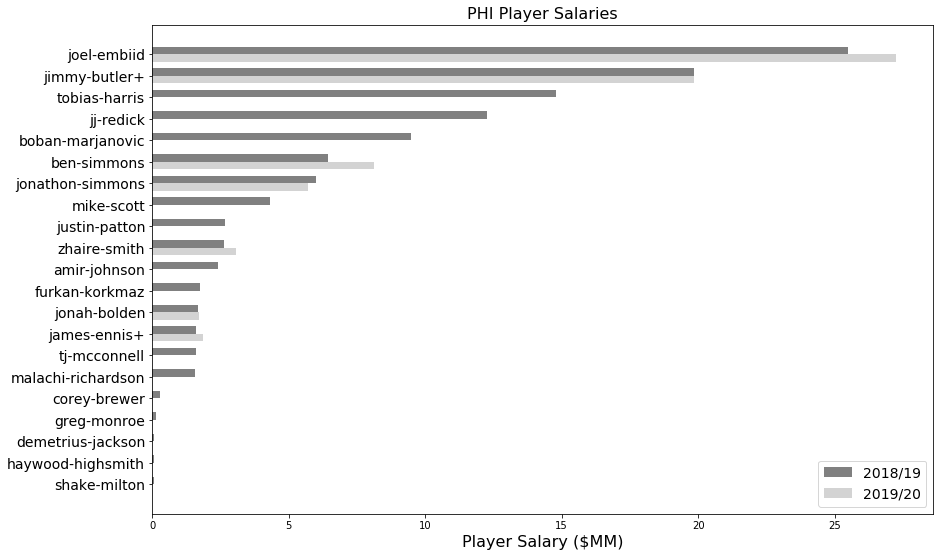

In [16]:
player_viz

- Joel Embiid leads the team in salary, making \$27,250,000 next season
- Expect some significant roster turnover. The 76ers have many impending free agents.
- The '+' next to a name signifies a player option. Both Jimmy Butler and James Ennis are expected to decline their player options this summer and elect free agency.

## Team Salaries (Historical)

In [17]:
historical_salaries = salaries.HistoricalSalaries('2009-2010')

In [18]:
historical_team_df = pd.DataFrame(historical_salaries.totals).T
historical_team_df.columns = historical_salaries.totals_columns

In [19]:
historical_team_df['team'] = [ID_TO_TEAM_NBA[x] for x in historical_team_df.index.values]

In [20]:
historical_team_df.head()

,2009/10,2009/10(*),url,team
1610612737,65883642,76970285,https://hoopshype.com/salaries/atlanta_hawks/2...,ATL
1610612738,83552174,97612009,https://hoopshype.com/salaries/boston_celtics/...,BOS
1610612739,83398534,97432514,https://hoopshype.com/salaries/cleveland_caval...,CLE
1610612740,70163827,81970723,https://hoopshype.com/salaries/new_orleans_pel...,NOP
1610612741,69700359,81429260,https://hoopshype.com/salaries/chicago_bulls/2...,CHI


In [21]:
historical_team_viz = compare_seasons(historical_team_df, '2009/10', '2009/10(*)')

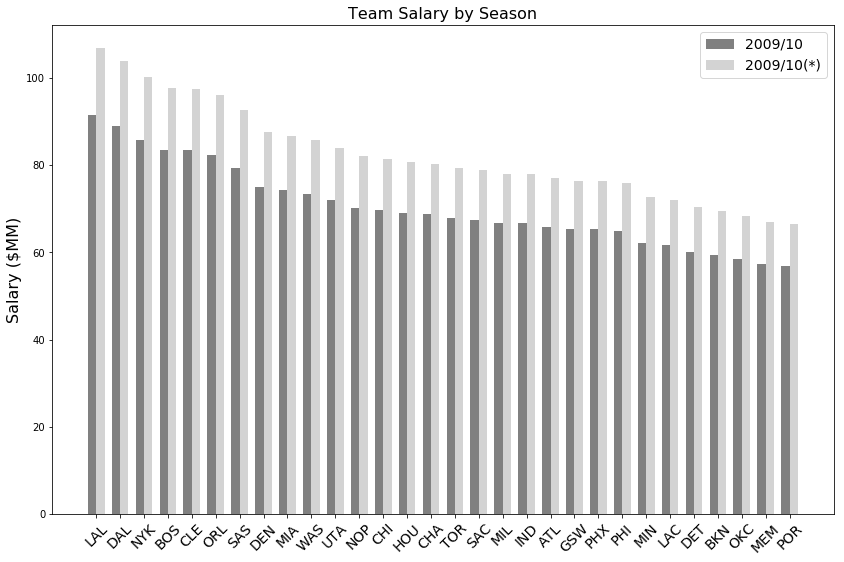

In [22]:
historical_team_viz

The above figure shows the 2009-2010 salary by team, along with inflation adjusted salary.
- The Lakers led the league due to paying players such as Kobe Bryant, Pau Gasol, and Andrew Bynum
- All of those players made more than Portland's top paid player: Darius Miles
- The Knicks had the highest paid player in the league, Tracy McGrady, making $23.2 million

## Player Salaries (Historical)

In [23]:
team_id = '1610612747'  # Lakers
team_player = historical_salaries.team_player_salaries[team_id]

In [24]:
team_player_salary = [team_player[x]['salary'] for x in team_player]
salary_df = pd.DataFrame(team_player_salary)

In [25]:
salary_df.columns = historical_salaries.team_player_columns

In [26]:
salary_df['name'] = [x for x in team_player]

In [27]:
historical_viz = compare_player_seasons(salary_df,
                                        pd.DataFrame({'2009/10(*)': ['']*len(salary_df)}),
                                        '2009/10', '2009/10(*)', team_id)

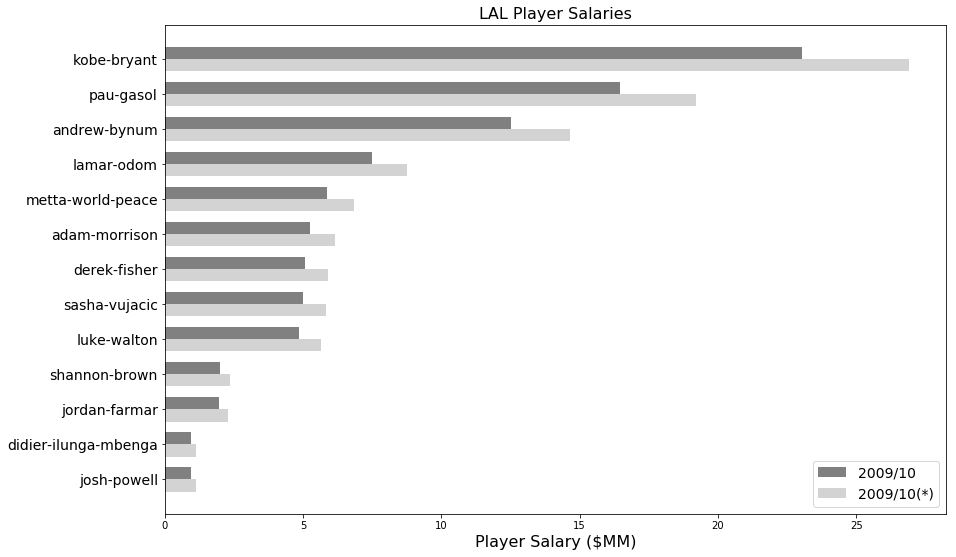

In [28]:
historical_viz

- Kobe was second in the league in salary, making \$23 million
- The NBA champions also had a pretty substantial middle class, from Luke Walton making \$4.8 million to Lamar Odom making \$7.5 million

## Exploration

- Find salary cap information and effectively communicate that in these or other visualizations
- See how adding (or subtracting) a player from a roster would effect a team's salary for the 2019-20 season.